![Logo 1](https://git.wmi.amu.edu.pl/AITech/Szablon/raw/branch/master/Logotyp_AITech1.jpg)
<div class="alert alert-block alert-info">
<h1> Komputerowe wspomaganie tłumaczenia </h1>
<h2> 8. <i>Wykorzystanie tłumaczenia automatycznego we wspomaganiu tłumaczenia</i> [laboratoria]</h2> 
<h3>Rafał Jaworski (2021)</h3>
</div>

![Logo 2](https://git.wmi.amu.edu.pl/AITech/Szablon/raw/branch/master/Logotyp_AITech2.jpg)

W dzisiejszych czasach, niezwykle ważną techniką wspomagania tłumaczenia jest użycie tłumaczenia maszynowego. Tekst źródłowy do tłumaczenia jest najpierw tłumaczony całkowicie autommatycznie, a następnie tłumacz ludzki dokonuje korekty wyniku. Technologia tłumaczenia maszynowego jest już na tyle dojrzała, że oferuje bardzo wysoką jakość wyników. Coraz częstsze stają się scenariusze, w których ludzka korekta to niemal całkowicie machinalne (sic!) zatwierdzanie wyników tłumaczenia maszynowego. Na dzisiejszych zajęciach poznamy techniki ewaluacji tłumaczenia maszynowego oraz sprawdzania jego przydatności w procesie wspomagania tłumaczenia ludzkiego.

Jakość tłumaczenia maszynowego możemy oceniać na dwóch niezależnych płaszczyznach: dokładność i płynność. Płynność jest subiektywnie odbieranym odczuciem, że czytany tekst jest napisany językiem naturalnym i zrozumiałym. Systemy tłumaczenia maszynowego oparte na uczeniu głębokim z wykorzystaniem sieci neuronowych osiągają duży stopień płynności tłumaczenia. Niestety jednak ich dokładność nie zawsze jest równie wysoka.

Dokładność tłumaczenia maszynowego jest parametrem, który łatwiej zmierzyć. Wartość takich pomiarów daje obraz tego, jaka jest faktyczna jakość tłumaczenia maszynowego i jaka jest jego potencjalna przydatność we wspomaganiu tłumaczenia.

Najczęściej stosowaną techniką oceny tłumaczenia maszynowego jest ocena BLEU. Do obliczenia tej oceny potrzebny jest wynik tłumaczenia maszynowego oraz referencyjne tłumaczenie ludzkie wysokiej jakości.

### Ćwiczenie 1: Zaimplementuj program do obliczania oceny BLEU dla korpusu w folderze data. Użyj implementacji BLEU z pakietu nltk. Dodatkowe wymaganie techniczne - napisz program tak, aby nie musiał rozpakwowywać pliku zip z korpusem na dysku.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import zipfile

archive = zipfile.ZipFile('./data/corpus_corrected.zip', 'r')

n_samples = -1
original_text = archive.read('corpus_en.txt').decode('utf-8')[:n_samples]
reference_text = archive.read('corpus_de_human.txt').decode('utf-8')[:n_samples]
candidate_text = archive.read('corpus_de_nmt.txt').decode('utf-8')[:n_samples]

len(reference_text), len(candidate_text)

(119008, 117487)

In [3]:
from nltk.translate.bleu_score import sentence_bleu

In [4]:
def calculate_bleu():
    return sentence_bleu(reference_text, candidate_text)

calculate_bleu()

3.088188515329241e-232

### Ćwiczenie 2: Oblicz wartość bleu na różnych fragmentach przykładowego korpusu (np. na pierwszych 100 zdaniach, zdaniach 500-600). Czy w jakimś fragmencie korpusu jakość tłumaczenia znacząco odbiega od średniej?

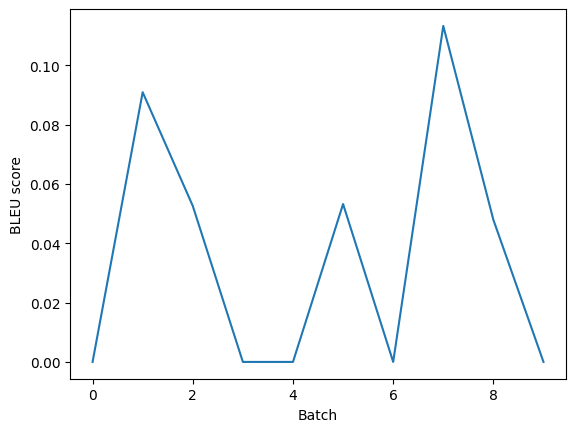

In [5]:
import matplotlib.pyplot as plt

def analyze_bleu():
    reference_sentences = reference_text.split('\n')
    candidate_sentences = candidate_text.split('\n')

    # Calculate BLEU scores for every group of 100 sentences
    bleu_scores = []
    for i in range(0, len(reference_sentences), 100):
        reference_batch = reference_sentences[i:i+100]
        candidate_batch = candidate_sentences[i:i+100]
        bleu_scores.append(sentence_bleu([reference_batch], candidate_batch))

    plt.plot(bleu_scores)
    plt.ylabel('BLEU score')
    plt.xlabel('Batch')
    plt.show()

analyze_bleu()

Inną metodą oceny jakości tłumaczenia maszynowego jest parametr WER - Word Error Rate. Definiuje się on w następujący sposób:

$WER = \frac{S+D+I}{N}=\frac{S+D+I}{S+D+C}$

gdzie:
 * S - liczba substytucji (słów)
 * D - liczba usunięć
 * I - liczba wstawień
 * C - liczba poprawnych śłów
 * N - liczba słów w tłumaczeniu referencyjnym (N=S+D+C)

Miara ta jest zwykle używana w do oceny systemów automatycznego rozpoznawania mowy, jednak w kontekście wspomagania tłumaczenia może być rozumiana jako wielkość nakładu pracy tłumacza nad poprawieniem tłumaczenia maszynowego.

### Ćwiczenie 3: Oblicz wartość WER dla przykładowego korpusu. Skorzystaj z gotowej implementacji WER.

In [6]:
from jiwer import wer

def calculate_wer():
    return wer(reference_text, candidate_text)

calculate_wer()

0.16925791156687617

Poza wymienionymi powyżej, stosować można jeszcze inne miary oparte na porównywaniu tłumaczenia maszynowego z ludzkim. Przypomnijmy sobie jedną, którą stosowaliśmy wcześniej.

### Ćwiczenie 4: Oblicz średnią wartość dystansu Levenshteina pomiędzy zdaniami przetłumaczonymi automatycznie oraz przez człowieka. Użyj implementacji z ćwiczeń nr 2.

In [7]:
from Levenshtein import distance

def calculate_levenshtein():
    return distance(reference_text, candidate_text)

calculate_levenshtein()

14645

A teraz sprawdźmy coś jeszcze. W danych przykładowego korpusu znajduje się także angielski tekst źródłowy. Teoretycznie, dobre tłumaczenie niemieckie powinno zawierać jak najwięcej słów z angielskiego źródła. Wykonajmy najstępujący eksperyment:

### Ćwiczenie 5: Dla każdej trójki zdań z korpusu przykładowego wykonaj następujące kroki:
 * Przetłumacz każde angielskie słowo na niemiecki przy użyciu modułu PyDictionary.
 * Sprawdź, które z niemieckich tłumaczeń zawiera więcej spośród tych przetłumaczonych słów - automatyczne, czy ludzkie.
Następnie wypisz statystyki zbiorcze. Które tłumaczenie zawiera więcej słownikowych tłumaczeń słów ze źródła?

In [ ]:
from PyDictionary import PyDictionary

def analyze_translations():
    dictionary=PyDictionary()
    english_words = set(original_text.split())
    
    german_words = set()
    for word in english_words:
        try:
            german_word = dictionary.translate(word, 'de')
            german_words.add(german_word)
        except:
            pass

    reference_words = set(reference_text.split())
    candidate_words = set(candidate_text.split())

    manual_translations, automatic_translations = 0, 0
    for word in german_words:
        if word in candidate_words:
            automatic_translations += 1    
        if word in reference_words:
            manual_translations += 1

    return manual_translations, automatic_translations

manual_translations, automatic_translations = analyze_translations()

In [9]:
print(f"Manual translations: {manual_translations}")
print(f"Automatic translations: {automatic_translations}")

Manual translations: 134
Automatic translations: 122
